# <font color='black'>Data Science Academy - Projeto 03</font>
# <font color='black'>Prevendo o Nível de Satisfação dos Clientes do Santander</font>

https://www.kaggle.com/c/santander-customer-satisfaction

In [1]:
# Importando pacotes
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [2]:
# Lendo os arquivos csv de treino e teste
df_train = pd.read_csv("train.csv") 
df_test = pd.read_csv("test.csv")

# Visualizando as primeiras linhas
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
# Verificando quantas linhas/colunas do conjunto de dados
df_train.shape

(76020, 371)

In [4]:
# Sumário de estatisticas
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# Verificando a variável TARGET (Cliente Satifisfeito = 0, Cliente Insatisfeito = 1)
df = pd.DataFrame(df_train.TARGET.value_counts())
df['Porcentagem'] = 100*df['TARGET']/df_train.shape[0]
df

,TARGET,Porcentagem
0,73012,96.043147
1,3008,3.956853


In [6]:
# Criando função para normalizar os dados
def normalizar(X):
    scaler = MinMaxScaler(feature_range = (0, 1))
    rescaledX = scaler.fit_transform(X)
    return rescaledX

In [7]:
# Preparando os dados - Retirando colunas que não serão usadas para criação do modelo preditivo 
X_train = df_train.drop(labels=["TARGET","ID"], axis=1)
Y_train = df_train["TARGET"]
X_test = df_test.drop(labels=["ID"], axis=1)

# Normalizando os dados
X_train_norm = normalizar(X_train)
X_test_norm = normalizar(X_test)

# Visualizando os resultados dos dados de treino normalizados
X_train_norm

array([[0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00154526],
       [0.99976406, 0.29      , 0.        , ..., 0.        , 0.        ,
        0.0020025 ],
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00282212],
       ...,
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.003126  ],
       [0.99976406, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.00359128],
       [0.99976406, 0.41      , 0.        , ..., 0.        , 0.        ,
        0.00509076]])

In [8]:
# Aplicando o método PCA (Principal Component Analysis) para reduzir a dimensionalidade
pca = PCA(n_components = 5)

# Reduzindo a dimensão do dataset de treino usando PCA
treino_reduzido = pca.fit_transform(X_train_norm)

# Reduzindo a dimensão do dataset de teste
teste_reduzido = pca.fit_transform(X_test_norm)

In [9]:
# Dados treino - Transformando os componentes em dataframe
df_treino_reduzido = pd.DataFrame(treino_reduzido)
df_treino_reduzido

,0,1,2,3,4
0,-1.274542,0.375972,0.056829,-0.439875,-0.039916
1,-0.108038,-0.048862,1.799190,0.203618,-1.327840
2,0.027935,-0.439468,-0.335930,-0.187874,-0.066789
3,1.427146,1.492291,-0.688243,0.024221,-0.671363
4,0.426464,0.122872,1.311621,0.190963,1.681094
...,...,...,...,...,...
76015,-1.270342,0.384579,0.077956,-0.434298,-0.040857
76016,-0.067651,0.107534,1.304143,0.150065,1.499899
76017,-0.106216,-0.347587,-0.295098,-0.193288,-0.058630
76018,0.048572,-0.431814,-0.295902,-0.319859,-0.060865


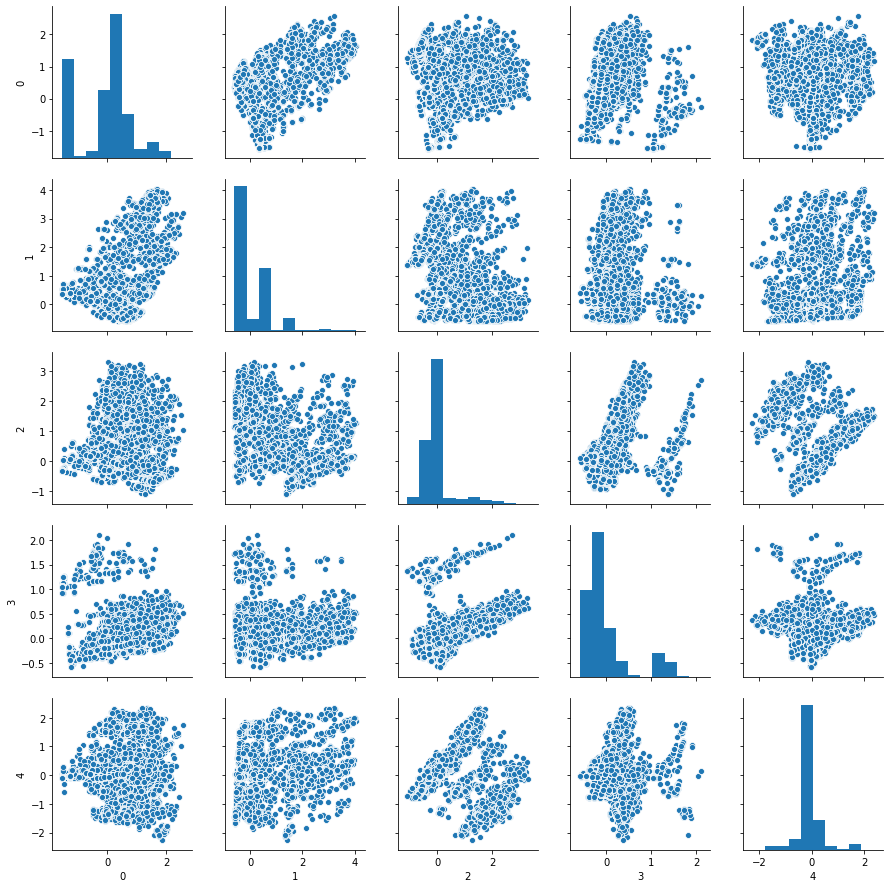

In [10]:
# Visões com Pairplot
sns.pairplot(df_treino_reduzido)

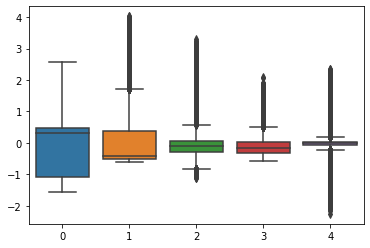

In [11]:
# Boxplot com orientação vertical
sns.boxplot(data = df_treino_reduzido, orient = "v")

LR: 0.714246 (0.005526)
LDA: 0.714023 (0.005804)
NB: 0.268127 (0.006519)
KNN: 0.812904 (0.007654)
CART: 0.832426 (0.005789)


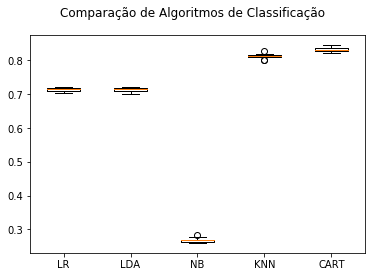

In [12]:
## Criação de modelos

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))

# Declarando variaveis a serem utilizadas para criacao e armazenamento dos modelos
resultados = []
nomes = []
kfold = KFold(n_splits = 10)

# Avaliando cada modelo em um loop
for nome, modelo in modelos:
    
    # Criando um pipeline para balancear a classe TARGET com o método SMOTE dentro do Cross-Validation
    imba_pipeline = make_pipeline(SMOTE(random_state=42),modelo)
    
    # Cross Validation
    cv_results = cross_val_score(imba_pipeline, df_treino_reduzido, Y_train, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    
    # Imprimindo resultados
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [13]:
# Selecionando o modelo de Decision Tree Classifier
modeloCART = [modelo for nome, modelo in modelos if nome == 'CART'][0]

# Treinando o modelo
modeloCART.fit(df_treino_reduzido,Y_train)

# Realizando as previsoes do modelo
previsoes = modeloCART.predict(df_treino_reduzido)

# Imprimindo a Confusion Matrix
matrix = confusion_matrix(Y_train, previsoes)
print(matrix)

[[72989    23]
 [ 1377  1631]]


In [14]:
## Otimizando o modelo

# Definindo os valores que serão testados no modelo Decision Tree Classifier
max_depth = [4,6,8,12]
splitter = ["best", "random"]
criterion = ["gini", "entropy"]

# Declarando variável com os valores para os hyperparametros 
valores_grid = {'max_depth': max_depth, 'splitter' : splitter, 'criterion' : criterion}
new_params = {'decisiontreeclassifier__' + key: valores_grid[key] for key in valores_grid}


# Criando pipe SMOTE e o modelo
pipe = make_pipeline(SMOTE(random_state=42),modeloCART)

# Criando o grid
grid = GridSearchCV(pipe, param_grid = new_params, cv=kfold)
grid.fit(df_treino_reduzido, Y_train)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 81.152
Melhores Parâmetros do Modelo:
 Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=42,
                       sampling_strategy='auto')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)


O modelo com GridSearch não melhorou a acurácia, logo usaremos o primeiro modelo criado Decision Tree Classifier

In [15]:
# Fazendo as previsoes para os dados de teste
previsoes_teste = modeloCART.predict(teste_reduzido)

# Preparando e visualizando o resultado no formato para entrega
df_resultado = pd.DataFrame({"ID":df_test['ID'], "TARGET":previsoes_teste})
df_resultado

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [16]:
# Salvando o resultado 
df_resultado.to_csv("resultado_final.csv", index=False)